# 角点检测算法

In [56]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [58]:
src = cv2.cvtColor(cv2.imread('../datas/checkerboard.jpg'),cv2.COLOR_BGR2RGB)

In [ ]:
def togray(src):
    rgb = np.float64(src)
    dst = 0.299 * rgb[:,:,0] + 0.587 * rgb[:,:,1] + 0.114 * rgb[:,:,2]
    return cv2.convertScaleAbs(dst)

# def get_iv(src):
#     Ix = np.zeros(src.shape,dtype=np.float64)
#     Iy = np.zeros(src.shape,dtype=np.float64)
#     Ixy = np.zeros(src.shape,dtype=np.float64)
#     rows,cols = src.shape[:2]
#     for i in range(1,rows - 1):
#         for j in range(1,cols - 1):
#             Ix[i, j] = np.abs(src[i + 1, j - 1] + src[i + 1, j] + src[i + 1, j + 1] - src[i - 1, j - 1] - src[i - 1, j] - src[i - 1, j + 1])  
#             Iy[i, j] = np.abs(src[i - 1, j + 1] + src[i, j + 1] + src[i + 1, j + 1] - src[i - 1, j - 1] - src[i, j - 1] - src[i + 1, j - 1])  
#             Ixy[i, j] = np.abs(Ix[i, j] * Iy[i, j]);
#     return Ix,Iy,Ixy

# def gaussian_filter(src):
#     rows,cols = src.shape[:2]
#     Ix = np.zeros_like(src)
#     for i in range(1,rows - 1):
#         for j in range(1,cols - 1):
#             Ix[i, j] = (src[i - 1, j - 1] + src[i, j - 1] * 2 + src[i + 1, j - 1] + 2 * src[i - 1, j] + 4 * Ix[i, j] + 2 * src[i + 1, j] + src[i - 1, j + 1] + 2 * src[i, j + 1] + src[i + 1, j + 1]) / 16
            
#     return Ix

# def get_cim(Ix,Iy,Ixy):
#     rows,cols = Ix.shape[0],Ix.shape[1]
#     results = np.zeros_like(Ix)
#     for i in range(1,rows-1):
#         for j in range(1,cols-1):
#             cim = np.abs(Ix[i, j] * Iy[i, j] - Ixy[i, j] * Ixy[i, j]) / (Ix[i, j] * Ix[i, j] + Iy[i, j] * Iy[i, j])
#             results[i,j] = cim
            
#     return results

# def get_max(src):
#     return np.max(src)

# def harris(src,crf):
#     rows,cols = src.shape[0],src.shape[1]
#     Ix = np.zeros((rows,cols),dtype=np.float64)
#     Iy = np.zeros((rows,cols),dtype=np.float64)
#     Ixy = np.zeros((rows,cols),dtype=np.float64)
#     result = np.zeros((rows,cols),dtype=np.float64)
    
#     srcBytes = np.float64(togray(src))
#     Ix,Iy,Ixy = get_iv(srcBytes)
#     Ix = gaussian_filter(Ix)
#     Iy = gaussian_filter(Iy)
#     Ixy = gaussian_filter(Ixy)
#     cim = get_cim(Ix,Iy,Ixy)
    
#     for i in range(1,rows - 1):
#         for j in range(1,cols - 1):
#             arr = [cim[i - 1, j - 1], cim[i, j - 1], cim[i + 1, j - 1], 
#                             cim[i - 1, j], cim[i, j], cim[i + 1, j], cim[i - 1, j + 1], 
#                             cim[i, j + 1], cim[i + 1, j + 1]]
#             max_value = max(arr)
#             if (cim[i,j] ==max_value) and (cim[i,j] > crf):
#                 result[i,j] = 1
#     return result

In [61]:
def findCorners(img, window_size, k, thresh):
    """
    Finds and returns list of corners and new image with corners drawn
    :param img: The original image
    :param window_size: The size (side length) of the sliding window
    :param k: Harris corner constant. Usually 0.04 - 0.06
    :param thresh: The threshold above which a corner is counted
    :return:
    """
    #Find x and y derivatives
    dy, dx = np.gradient(img)
#     res = np.gradient(img)
    
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    height = img.shape[0]
    width = img.shape[1]

    cornerList = []
    newImg = img.copy()
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
    offset = window_size//2

    #Loop through image and find our corners
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            #Calculate sum of squares
            windowIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            #Find determinant and trace, use to get corner response
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            r = det - k*(trace**2)

            #If corner response is over threshold, color the point and add to corner list
            if r > thresh:
#                 print x, y, r
                cornerList.append([x, y, r])
                color_img.itemset((y, x, 0), 0)
                color_img.itemset((y, x, 1), 0)
                color_img.itemset((y, x, 2), 255)
    return color_img, cornerList

In [62]:
# dst = harris(src,1000)

In [63]:
gray = togray(src)
cimg,corners = findCorners(gray,5,0.04,1000)

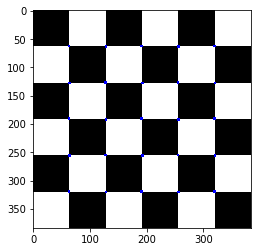

In [64]:
plt.imshow(cimg)

参考：

[1]. https://blog.csdn.net/woxincd/article/details/60754658

[2]. https://blog.csdn.net/trent1985/article/details/45023059